In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
boston = load_boston()

In [9]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
boston_raw = pd.DataFrame(boston.data)

In [14]:
boston_raw.columns = boston.feature_names

In [18]:
boston_raw['PRICE'] = boston.target

In [23]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
boston_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
boston_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [26]:
boston_raw.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


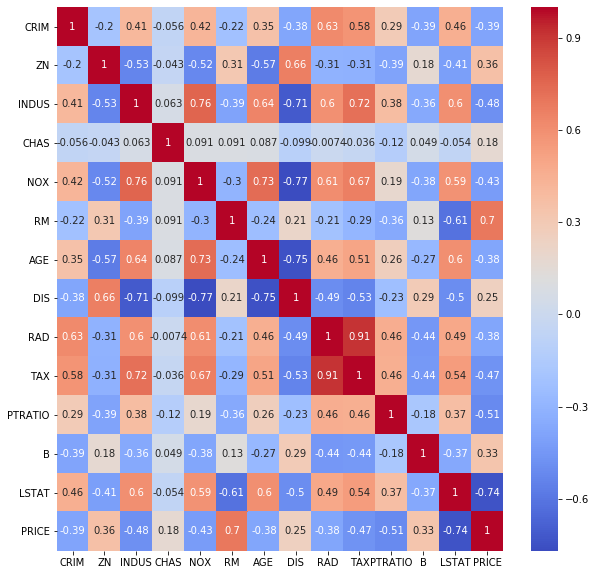

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_raw.corr(),annot=True,cmap='coolwarm')

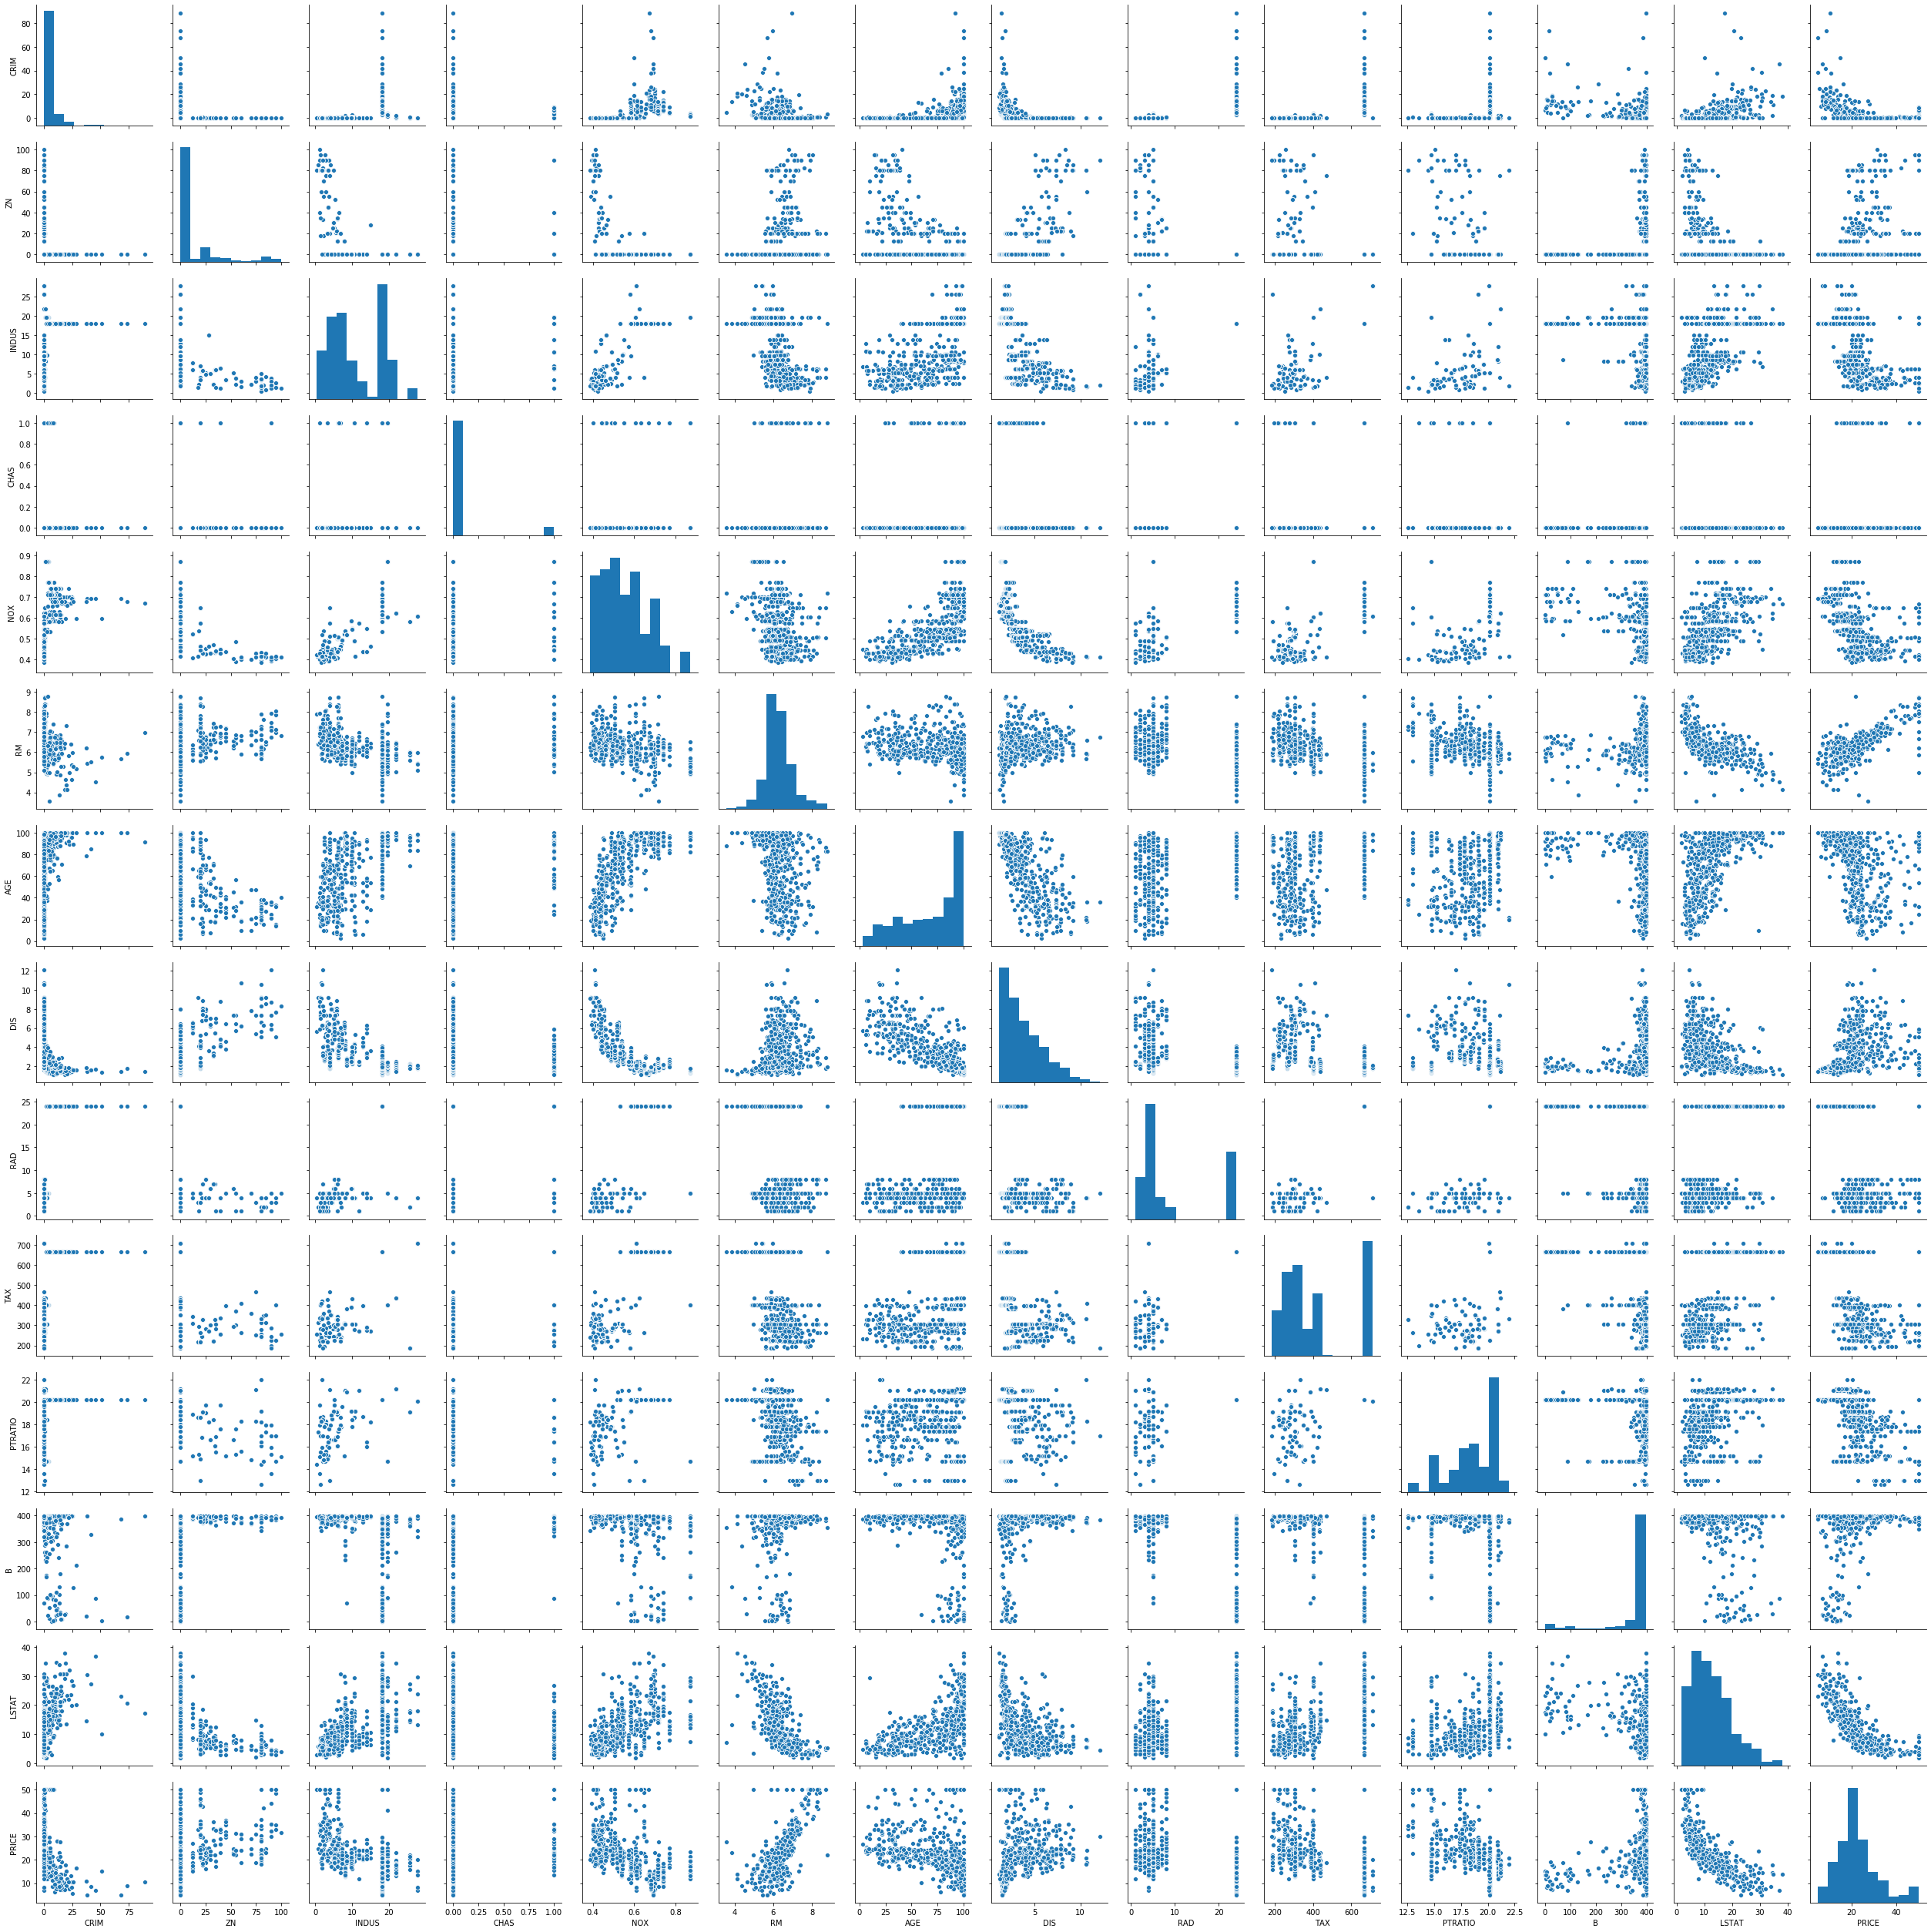

In [33]:
sns.pairplot(boston_raw)

In [46]:
X = boston_raw[boston_raw.columns[:-1]]
y = boston_raw['PRICE']

In [47]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [60]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [61]:
vif['Features'] = X.columns

In [62]:
vif

,VIF,Features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


In [63]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

In [91]:
lr = LinearRegression()

In [92]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.75756860946748
0.6745585065949422


In [94]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

C:\Users\georg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [95]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9730997512798154
0.8737062318403489


In [96]:
vif

,VIF,Features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


In [137]:
X_proc = X.copy()

In [138]:
X_proc['INDUS_LEVEL'] = X_proc['INDUS']*X_proc['NOX']


In [139]:
X_proc.drop('INDUS',axis=1,inplace=True)
X_proc.drop('NOX',axis=1,inplace=True)
X_proc.drop('RAD',axis=1,inplace=True)
X_proc.drop('ZN',axis=1,inplace=True)
X_proc.drop('CHAS',axis=1,inplace=True)

In [140]:
vif_proc = pd.DataFrame()
vif_proc['VIF'] = [variance_inflation_factor(X_proc.values,i) for i in range(len(X_proc.columns))]
vif_proc['features'] = X_proc.columns

In [141]:
vif_proc

,VIF,features
0,1.943063,CRIM
1,52.852436,RM
2,19.829028,AGE
3,11.023323,DIS
4,21.894098,TAX
5,70.232499,PTRATIO
6,19.200068,B
7,10.240257,LSTAT
8,10.787300,INDUS_LEVEL


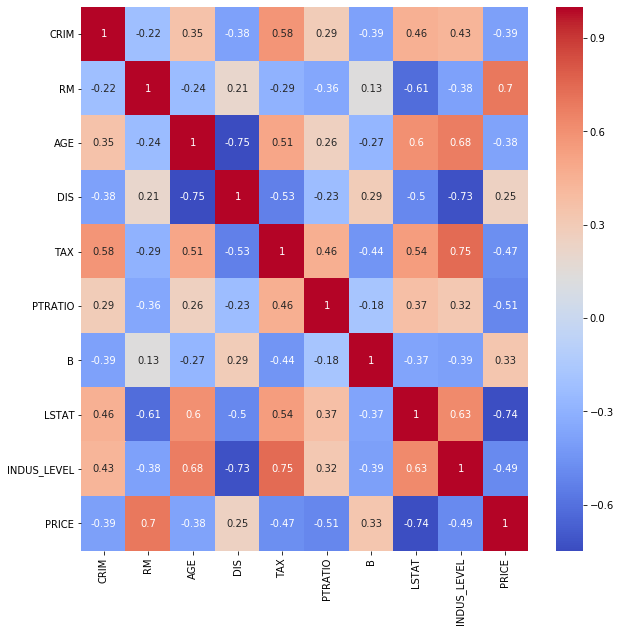

In [142]:
boston_proc = X_proc.copy()
boston_proc['PRICE'] = y
plt.figure(figsize=(10,10))
sns.heatmap(boston_proc.corr(),annot=True,cmap='coolwarm')

In [143]:
X_train_proc,X_test_proc,y_train_proc,y_test_proc = train_test_split(X_proc,y,random_state=10)

In [186]:
lr_proc = LinearRegression()
lr_proc.fit(X_train_proc,y_train_proc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
print(lr_proc.score(X_train_proc,y_train_proc))
print(lr_proc.score(X_test_proc,y_test_proc))

0.7851655352944004
0.7290364532354017


In [188]:
mean_squared_error(y_test_proc.values,lr_proc.predict(X_test_proc))

27.01175168911004

In [189]:
rfr_proc = RandomForestRegressor()
rfr_proc.fit(X_train_proc,y_train_proc)

C:\Users\georg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [190]:
print(rfr_proc.score(X_train_proc,y_train_proc))
print(rfr_proc.score(X_test_proc,y_test_proc))

0.972509572102522
0.8383441435757218


In [191]:
mean_squared_error(y_test_proc.values,rfr_proc.predict(X_test_proc))

16.11511181102362

([<matplotlib.axis.YTick at 0x20942716a58>,
 <a list of 9 Text yticklabel objects>)

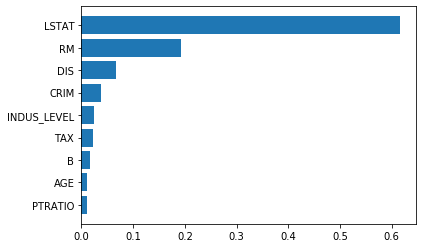

In [192]:
indices = np.argsort(rfr_proc.feature_importances_)
plt.barh(range(len(indices)),rfr_proc.feature_importances_[indices])
plt.yticks(range(len(indices)),[X_proc.columns[i] for i in indices])

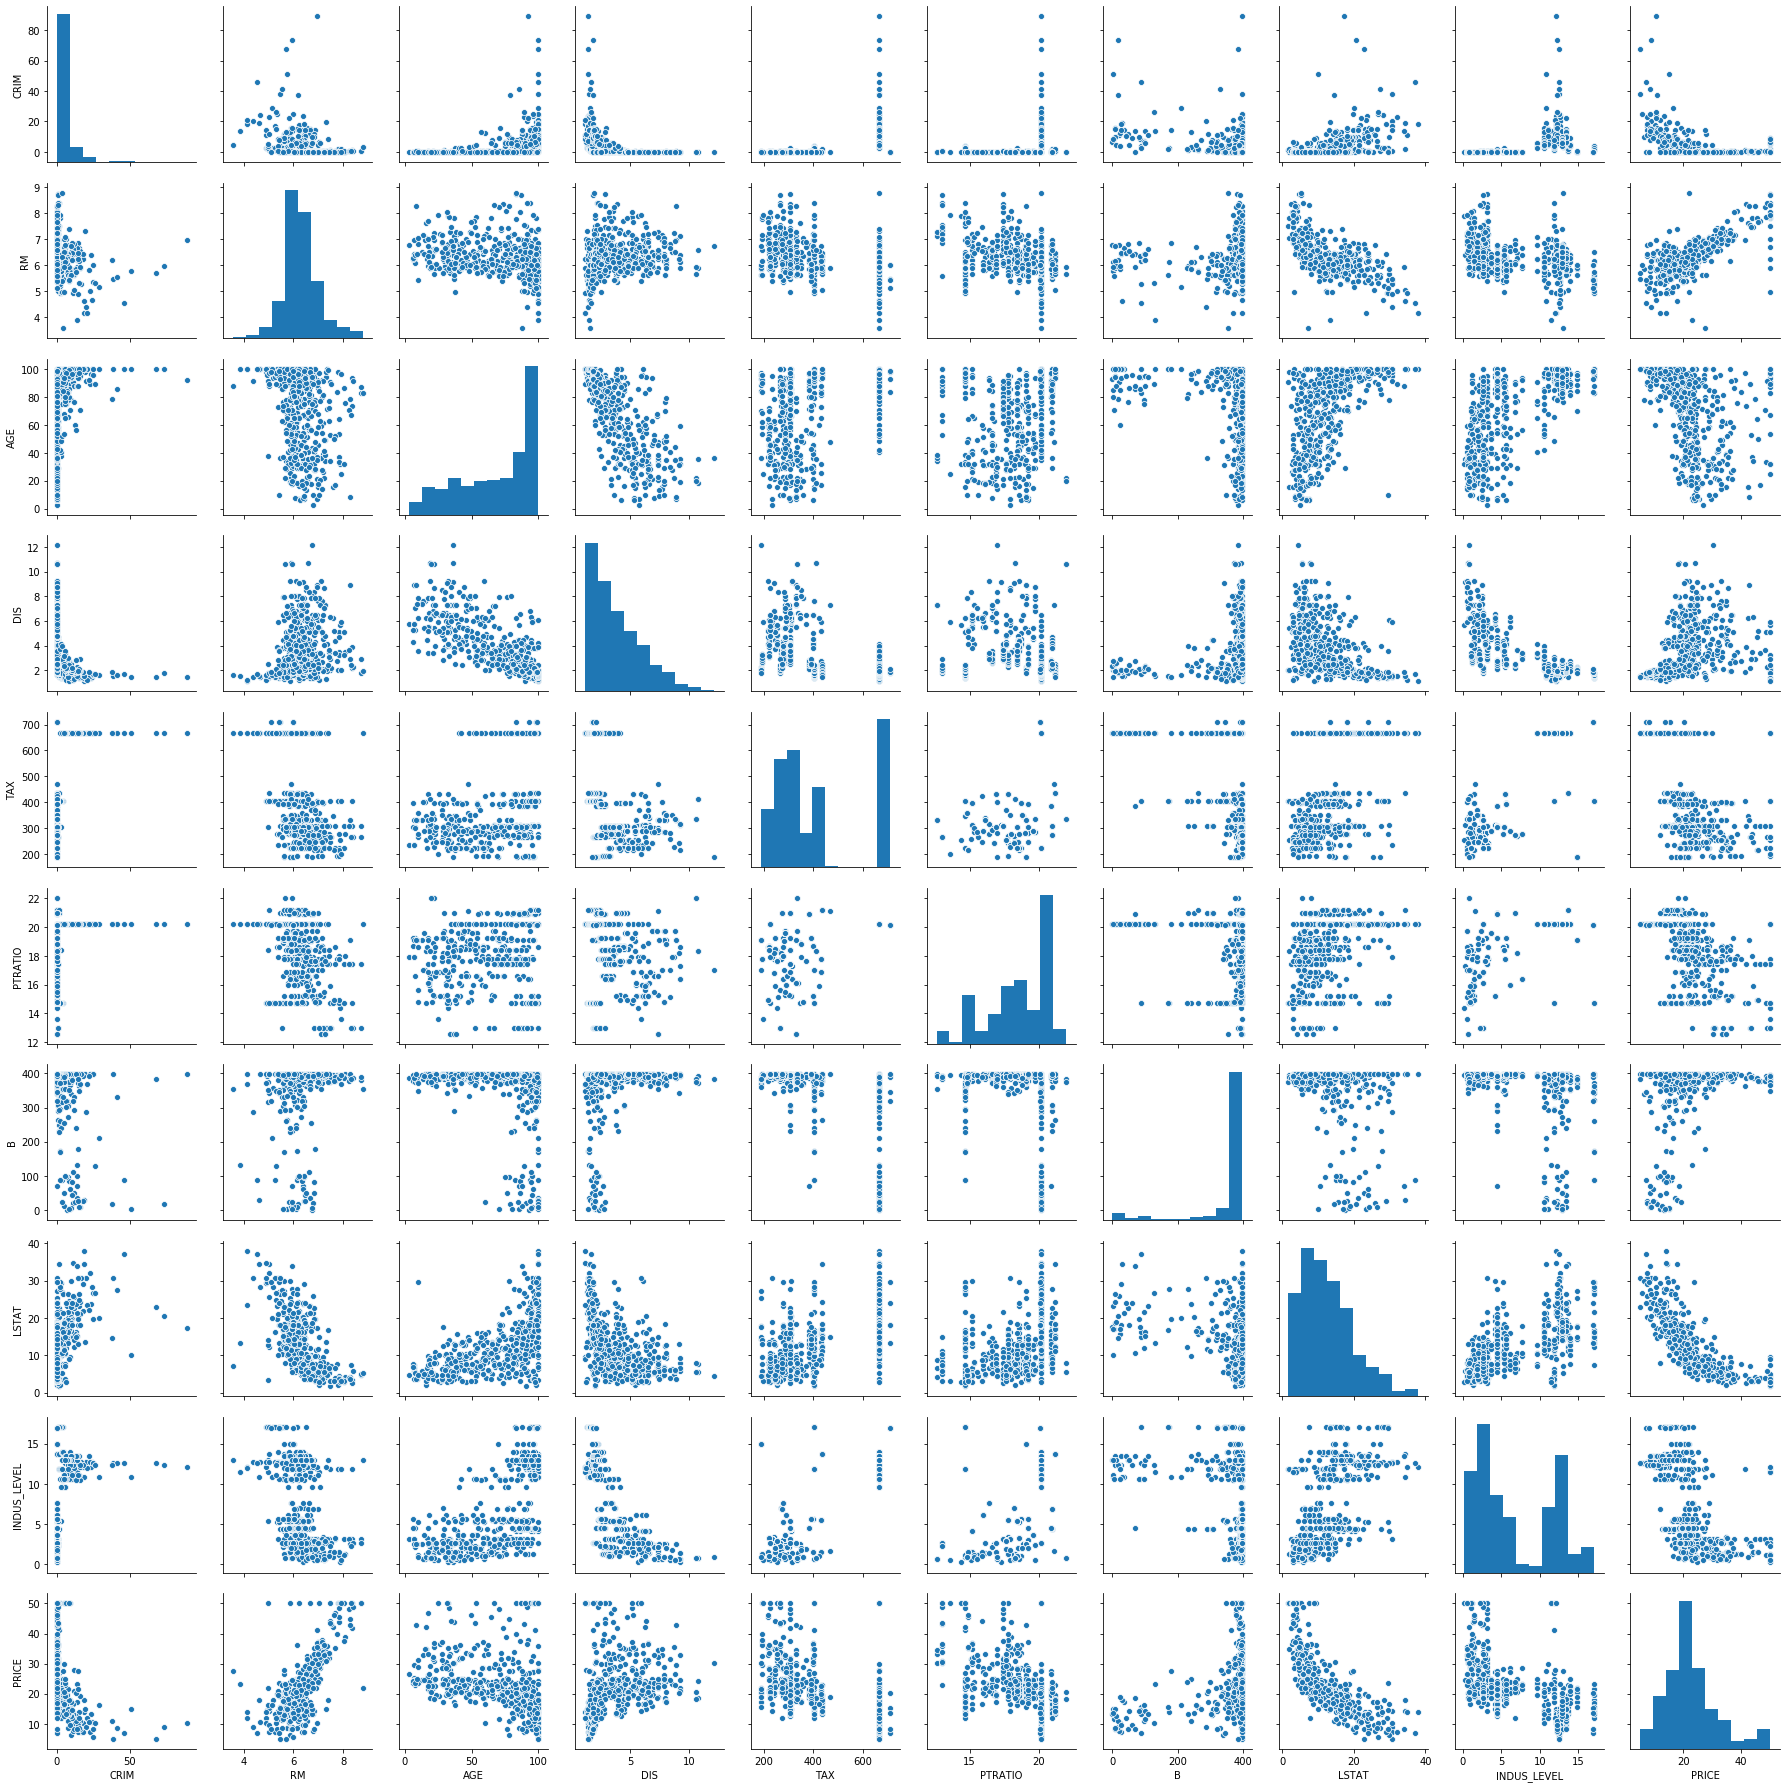

In [181]:
sns.pairplot(boston_proc)

In [182]:
X_proc['LSTAT'] = np.log(X_proc['LSTAT'])

In [183]:
boston_proc['LSTAT'] = X_proc['LSTAT']

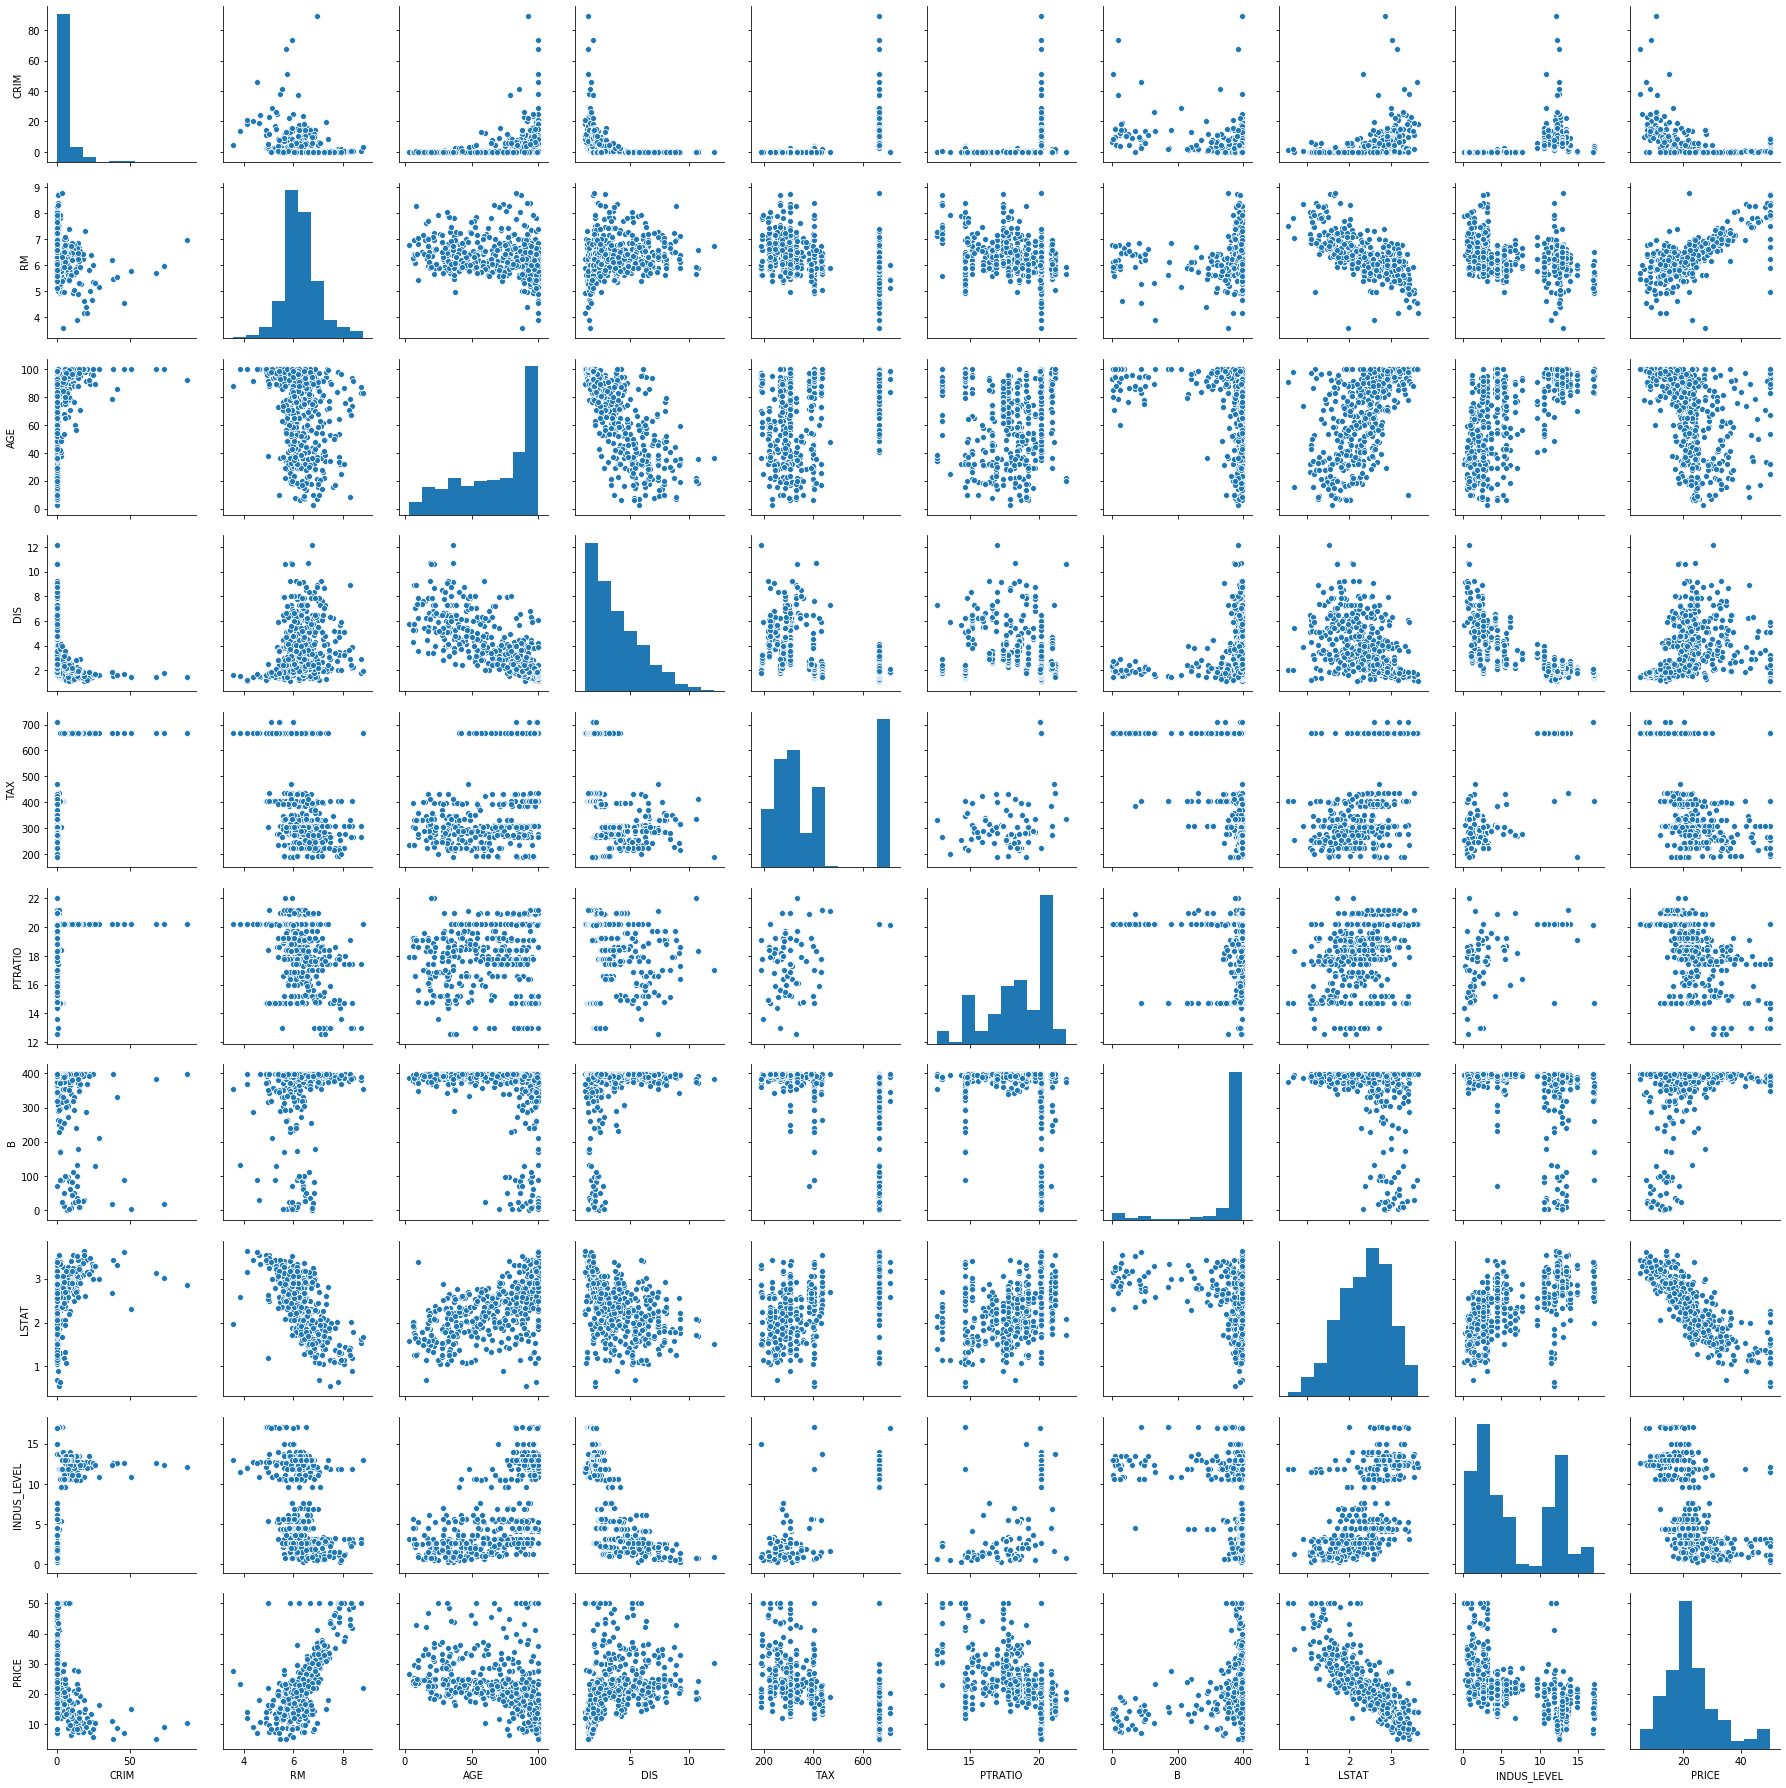

In [184]:
sns.pairplot(boston_proc)

In [185]:
X_train_proc,X_test_proc,y_train_proc,y_test_proc = train_test_split(X_proc,y,random_state=10)

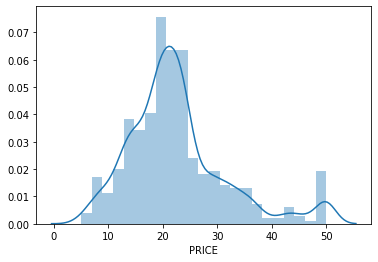

In [198]:
sns.distplot(boston_proc['PRICE'])